# Computational Physics Homework
- Melinda Walls
- 10/09/2023


# Problems
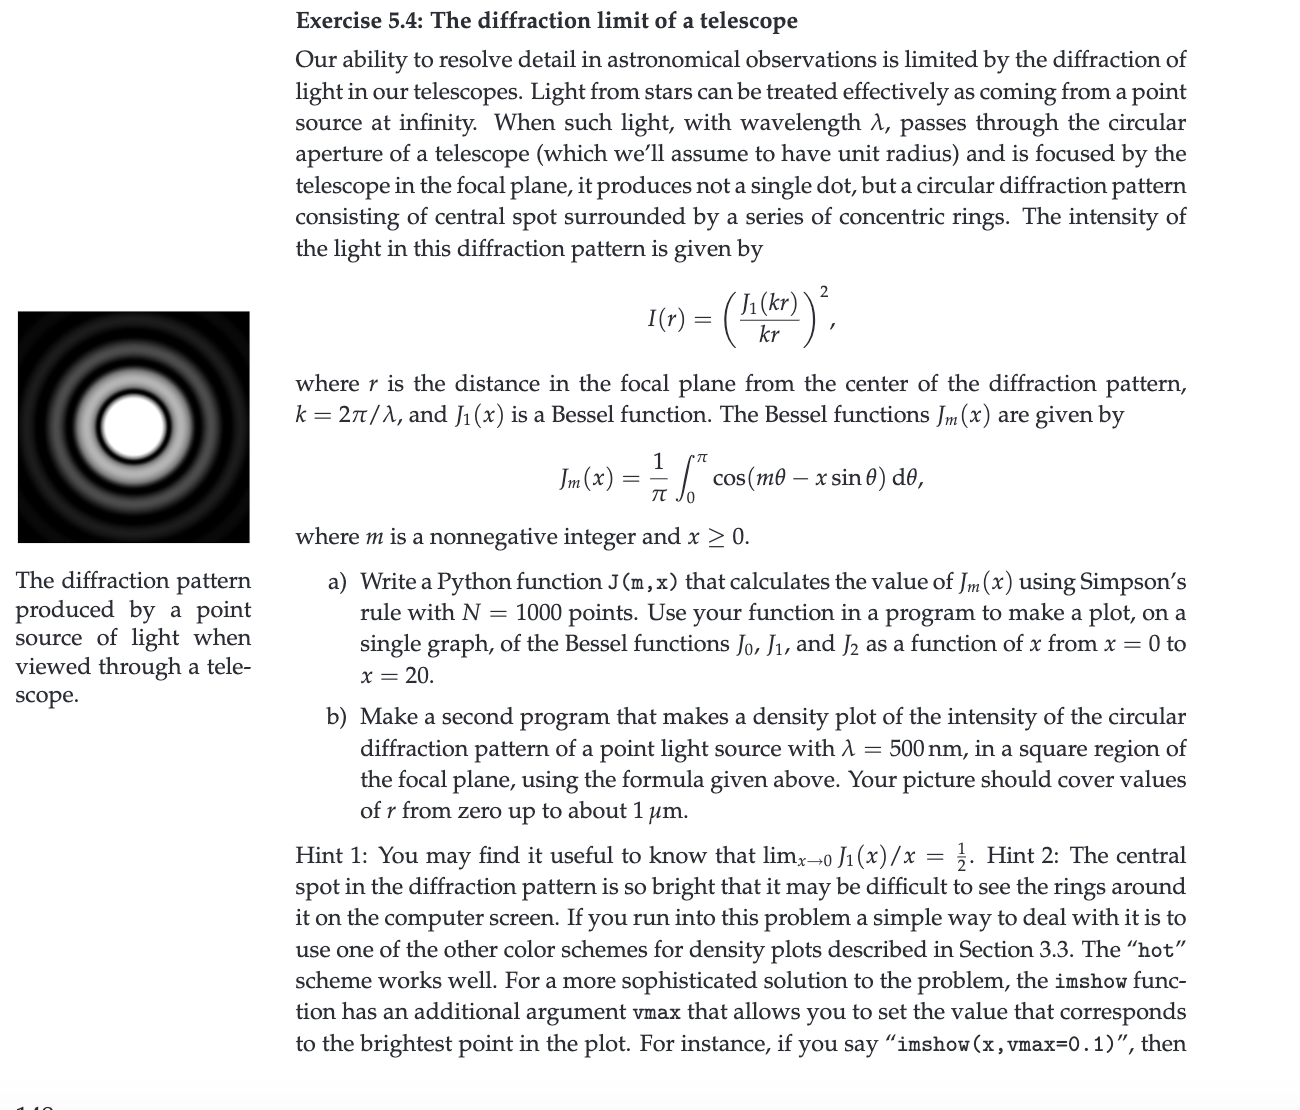

In [ ]:
from math import cos, pi, sin

import matplotlib.pyplot as plt
import numpy as np


# define function to plot diffraction gratings
def plot_diffractions(
    theta,
    intensity,
    color="blue",
    lw=2,
    figsize=(8, 8),
    figtitle=None,
    save_as=None,
    ylim=None,
    grid=False,
    show=False,
    **kwargs
):
    fig, axe = plt.subplots(
        subplot_kw={"projection": "polar"}, figsize=figsize, **kwargs
    )
    axe.plot(theta, intensity, color=color, lw=lw)

    if figtitle:
        axe.set_title(figtitle)

    if ylim:
        axe.set_ylim(ylim)

    if grid:
        axe.grid(True)

    if show:
        plt.show()

    if save_as:
        fig.savefig(save_as)


# define function for J_m Bessel Function
def bessel_fns(m, x, a=0, b=pi, N=1000, h=((pi - 0) / 1000)):
    func = lambda theta, x: cos(m * theta - x * sin(theta))

    # the answer of our integral
    int_ans = func(a, x) + func(b, x)

    # iterates through 1 for our integral answer
    for i in range(1, N):
        const = 4 if (i % 2 == 0) else 2
        int_ans += const * func(a + i * h)

    int_ans = (int_ans * h) / 3
    int_ans_final = int_ans / pi
    return int_ans_final


# define function to iterate through function
def getJ(index, array, func=bessel_fns):
    return [func(index, k) for k in array]


# define functioun for intensity density
def densityofi(r, k, func=bessel_fns):
    if r <= 10**-8:
        return (1 / (2 * k)) ** 2
    else:
        return (func(1, k * r) / (k * r)) ** 2


def getdensityofi(index, array, func=densityofi):
    return [func(index, k) for k in array]

# x values as a range from 0 to 20
x = np.linspace(0, 20, 1000)

# J_0, J_1, and J_2
J_0 = getJ(0, x, bessel_fns)
J_1 = getJ(1, x, bessel_fns)
J_2 = getJ(2, x, bessel_fns)

# this plots the different lines
plt.plot(x, J_0, "m-")  # maroon
plt.plot(x, J_1, "b-")  # blue
plt.plot(x, J_2, "r-")  # red

# --------------- part b ----------------
# intensity density graph
lambda_val = 500e-9  # 500 nm
k = (2 * 3.14) / lambda_val
r = np.linspace(0, 1e-6, 1000)

# plot diffraction gratings
